## Customer Personality Analysis
This project analyze the marketing_campaign dataset to try and understand connections between 
customer charactaristics to the amount of products he buys.

### 0. Imports

In [51]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


### 1. Introducing marketing dataset

In [52]:
dtf = pd.read_csv("./data/marketing_campaign.csv", index_col=0, delimiter='\t')
cols = ['Year_Birth','Education','Marital_Status','Income',	'Kidhome','Teenhome','Dt_Customer',	'Recency', 'TotalMntProducts','NumDealsPurchases'	,'NumWebPurchases',	'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Complain']
total_products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
# summing the total products:
dtf['TotalMntProducts'] = dtf[total_products].sum(axis=1)
# remove total products:
dtf = dtf.drop(total_products, axis=1)
dtf = dtf[cols]
dtf.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,TotalMntProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
ID,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,1617,3,8,10,4,7,0,0,0,0,0,0
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,27,2,1,1,2,5,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,776,1,8,2,10,4,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,53,2,2,0,4,6,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,422,5,5,3,6,5,0,0,0,0,0,0


In [53]:
dtf.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,TotalMntProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,605.798214,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375
std,11.984069,25173.076661,0.538398,0.544538,28.962453,602.249288,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,68.750000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,396.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,1045.500000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


First let's understand what total products is built from.


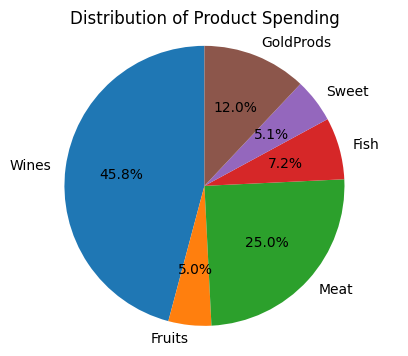

In [54]:
df = pd.read_csv("./data/marketing_campaign.csv", index_col=0, delimiter='\t')
total_products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['TotalMntProducts'] = df[total_products].sum(axis=1)

percentages = pd.DataFrame()
for col in total_products:
    percentages[col] = df[col] / df['TotalMntProducts']

df.drop('TotalMntProducts', axis=1, inplace=True)
mean_percentages = percentages.mean()

plt.figure(figsize=(5, 4))
plt.pie(mean_percentages, 
        labels=[col.replace('Mnt', '').replace('Products', '') for col in total_products],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Distribution of Product Spending')
plt.axis('equal')
plt.show()



#### Examining the target features - total products spending(combination of different products) 
we want to understand better our target audience that buys the most total products.

first we'll check how income effect the total number of products, to better understand our customers.

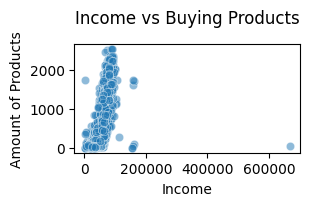

In [55]:
plt.subplot(3, 2, 1)
sns.scatterplot(data=dtf, x='Income', y='TotalMntProducts', alpha=0.5)
plt.title('Income vs Buying Products', fontsize=12, pad=15)
plt.xlabel('Income')
plt.ylabel('Amount of Products')
plt.show()

In this graph we can't see clearly the effect of income because of of outliers. We will build a new graph that filters this value.

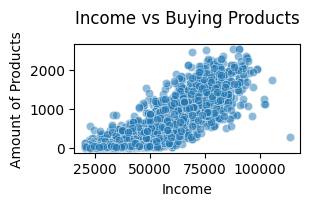

In [56]:
plt.subplot(3, 2, 1)
remove_outliers = dtf[dtf['Income']<150000]
remove_outliers = remove_outliers[remove_outliers['Income'] >20000]
sns.scatterplot(data=remove_outliers, x='Income', y='TotalMntProducts', alpha=0.5)
plt.title('Income vs Buying Products', fontsize=12, pad=15)
plt.xlabel('Income')
plt.ylabel('Amount of Products')
plt.show()

Now we can see better the effect of income now. from the graph it seems the effect of income is not exactly linear but close to being one. We can see that the amount of products is similar when the income is less then 50k. between 50-75k there is also simliarity and over 75k we can see clear rising in the amount of products.

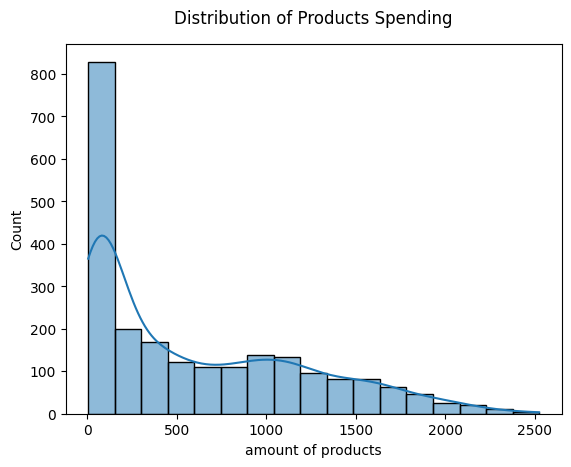

In [57]:
sns.histplot(data=dtf, x='TotalMntProducts', kde=True)
plt.title('Distribution of Products Spending', fontsize=12, pad=15)
plt.xlabel('amount of products')
plt.ylabel('Count')
plt.show()

This histogram tells us that most of the people tend to buy 0-500 products. then there are few that buy more then 2000, but the number is insignificant.
Also this distribution is a long tail, and right skewed. There is also second small peak at the middle which tells us there are relativley large amount of customers who buy in large amounts.

We saw in the data that there are 3 platforms to buy products. We will create a graph that will show which platform is the most profitable.

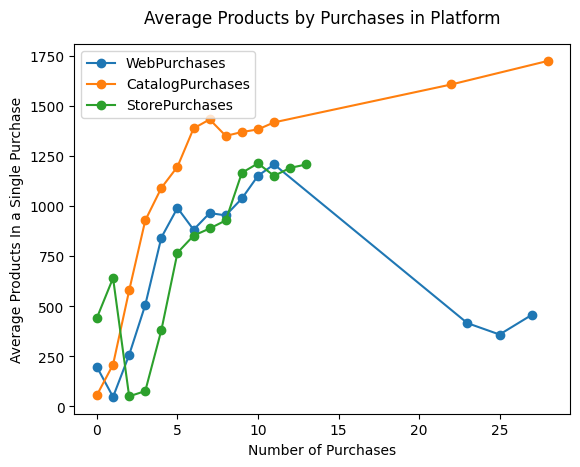

In [58]:
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_spending = []
for col in purchase_cols:
    spending_by_purchases = dtf.groupby(col)['TotalMntProducts'].mean().reset_index()
    plt.plot(spending_by_purchases[col], spending_by_purchases['TotalMntProducts'], 
             marker='o', label=col.replace('Num', ''))
plt.title('Average Products by Purchases in Platform', fontsize=12, pad=15)
plt.xlabel('Number of Purchases')
plt.ylabel('Average Products In a Single Purchase')
plt.legend()
plt.show()

We can learn from it that web and catalouge customers tend to return more.Also cataloge costumers have higher tendency to buy in large numbers.

Next, we will look at heatmap to get a better understanding about which features effect the most on our target

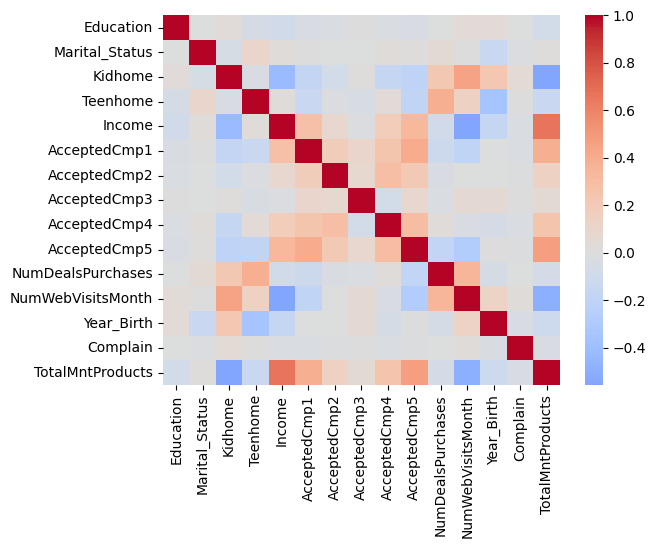

In [59]:
spending_cols = ['Education','Marital_Status','Kidhome','Teenhome',
                 'Income', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','NumDealsPurchases','NumWebVisitsMonth', 'Year_Birth', 'Complain', 'TotalMntProducts']
transform_categorial_cols = ['Education', 'Marital_Status' ]
# transform string categorial columns to numerical:
dtf[transform_categorial_cols] = dtf[transform_categorial_cols].apply(lambda x: pd.factorize(x)[0])

sns.heatmap(dtf[spending_cols].corr() ,cmap='coolwarm', center=0)
plt.show()


And now a "zoom in" on our target feature:

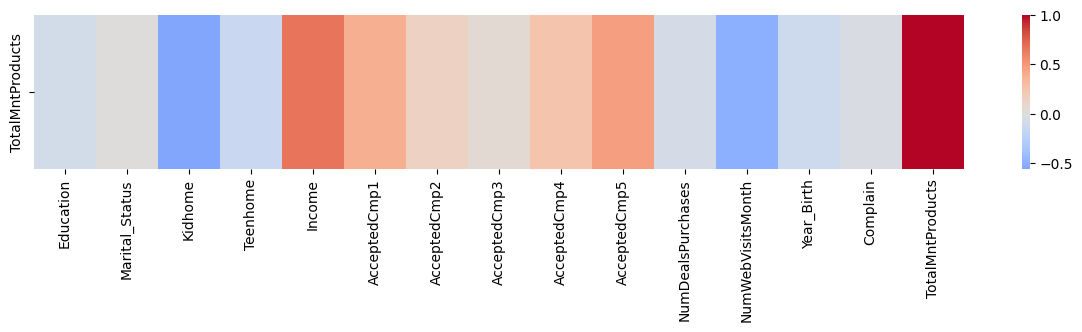

In [60]:
spending_cols = ['Education','Marital_Status','Kidhome','Teenhome',
                'Income', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','NumDealsPurchases','NumWebVisitsMonth', 'Year_Birth', 'Complain', 'TotalMntProducts']
transform_categorial_cols = ['Education', 'Marital_Status' ]

# transform string categorial columns to numerical:
dtf[transform_categorial_cols] = dtf[transform_categorial_cols].apply(lambda x: pd.factorize(x)[0])
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(dtf[spending_cols].corr().loc[['TotalMntProducts']] ,cmap='coolwarm', center=0)
plt.show()


This graph tells us which features have positive/negative impact on buying products. we can see that income has strong positive correlation, the campaigns have also positive correlation while kids and teens have negative correlation. We can also see that the first and fifth campaign brought us much more customers then the 2-4 campaign. so we should keep going with similar campagins as 1 and 5.

After seeing the correlation map it's intersting to see exactly how kids and teens effect our target feature. That's because it's unclear why kids effect negativly. let's go deeper into it by the next graph.

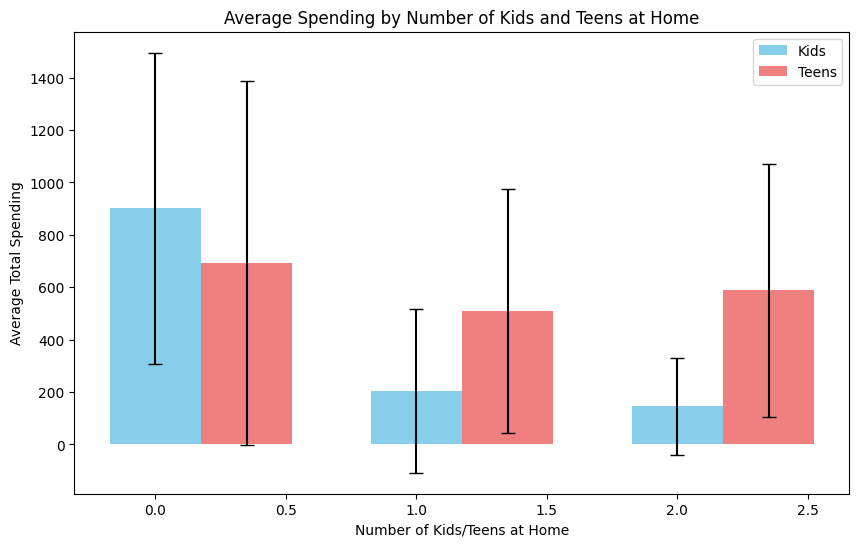

In [61]:
# Calculate averages
avg_spending_by_kids = dtf.groupby('Kidhome')['TotalMntProducts'].agg(['mean', 'std']).reset_index()
avg_spending_by_teens = dtf.groupby('Teenhome')['TotalMntProducts'].agg(['mean', 'std']).reset_index()

bar_width = 0.35
r1 = np.arange(len(avg_spending_by_kids))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, avg_spending_by_kids['mean'], 
        width=bar_width, 
        yerr=avg_spending_by_kids['std'], 
        capsize=5, 
        label='Kids',
        color='skyblue')

plt.bar(r2, avg_spending_by_teens['mean'], 
        width=bar_width, 
        yerr=avg_spending_by_teens['std'], 
        capsize=5, 
        label='Teens',
        color='lightcoral')

plt.xlabel('Number of Kids/Teens at Home')
plt.ylabel('Average Total Spending')
plt.title('Average Spending by Number of Kids and Teens at Home')
plt.legend()
plt.show()


This graph shows that the more kids and teens at home, the less spending on products. This is likely because families with more children have less disposable income to spend on items from this store.
It's important to notice that kids have much more effect then teens, which is intresting.
Now it's clearer that we should'nt target parents with young kids. parents with teens are fine.

R2 Score: 0.852
Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.338
Mean Absolute Error (Σ|y - pred|/n): 131
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 229


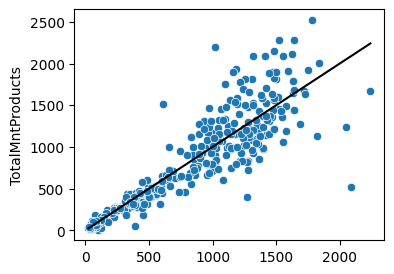

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
import matplotlib.pyplot as plt

X = dtf.drop(['TotalMntProducts'], axis=1)
y = dtf['TotalMntProducts']

transform_categorial_cols = ['Education', 'Marital_Status' ]

# transform string categorial columns to numerical:
X[transform_categorial_cols] = X[transform_categorial_cols].apply(lambda x: pd.factorize(x)[0])

# drop all non-numeric columns that left(only date column)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X = X[numeric_cols]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluations of model
print("R2 Score:", "{:,.3f}".format(r2_score(y_test, y_pred_test)))
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,y_pred_test)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, y_pred_test)))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

fig, ax = plt.subplots(figsize=(4,3))
sns.scatterplot(x=y_pred_test ,y=y_test,ax=ax)
sns.lineplot(x=y_pred_test, y=y_pred_test,ax=ax,color='black')
plt.show()

We can clearly see that as the amount of products go up the prediction error gets worse. 

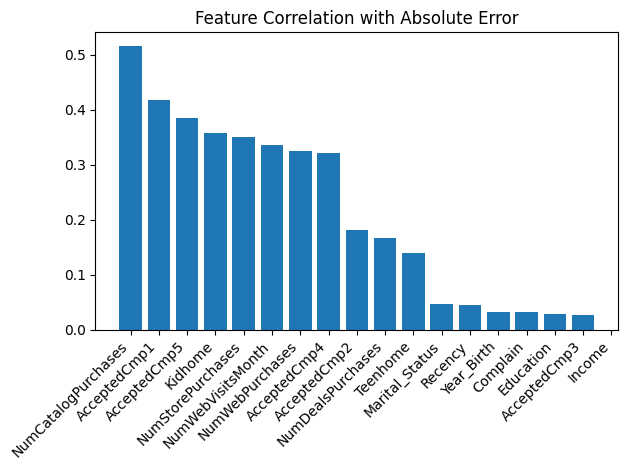

In [63]:
feature_names = X.columns
errors = y_test - y_pred_test
abs_errors = np.abs(errors)
percent_errors = (errors / y_test) * 100
feature_error_corr = pd.DataFrame()
for feature in feature_names:
    feature_error_corr.loc[feature, 'Error_Correlation'] = np.corrcoef(X_test[feature], abs_errors)[0,1]

feature_error_corr['Abs_Correlation'] = abs(feature_error_corr['Error_Correlation'])
feature_error_corr = feature_error_corr.sort_values('Abs_Correlation', ascending=False)

plt.bar(range(len(feature_error_corr)), feature_error_corr['Abs_Correlation'])
plt.xticks(range(len(feature_error_corr)), feature_error_corr.index, rotation=45, ha='right')
plt.title('Feature Correlation with Absolute Error')
plt.tight_layout()
plt.show()

This graph tells us that there is a large correlation between some features and the errors that the model does. NumCatalog and the 1,5 have high impact that sabotages the predictions.

Max Error: 1,564


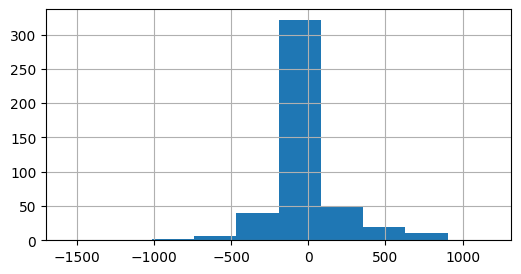

In [64]:
## residuals
residuals = y_test - y_pred_test
max_error = residuals.abs().max()
print("Max Error:", "{:,.0f}".format(max_error))

plt.figure(figsize=(6, 3))
residuals.hist()
plt.show()

This shows us that the model mostly accuracte (peak around zero) but it's also has mistakes, and large ones(we can see bins around 1000, -1000). We can see that the right side is slightly bigger which tells us that there are more overestimations.

In [65]:
positive_errors = errors[errors > 0]
negative_errors = errors[errors < 0]
bias_stats = {
    'over_predictions': (errors < 0).mean() * 100,
    'under_predictions': (errors > 0).mean() * 100,
    'mean_positive_error': positive_errors.mean(),
    'mean_negative_error': negative_errors.mean()
}

print("\nBias analysis:")
for key, value in bias_stats.items():
    print(f"{key}: {value:.2f}")


Bias analysis:
over_predictions: 56.25
under_predictions: 43.75
mean_positive_error: 148.31
mean_negative_error: -118.29


This results show us that the model overestimates then underestimates. also when it overestimates it's in larger numbers. supports the claim that there are more overestimations.

Let's see feature importance according to the xgb regressor:

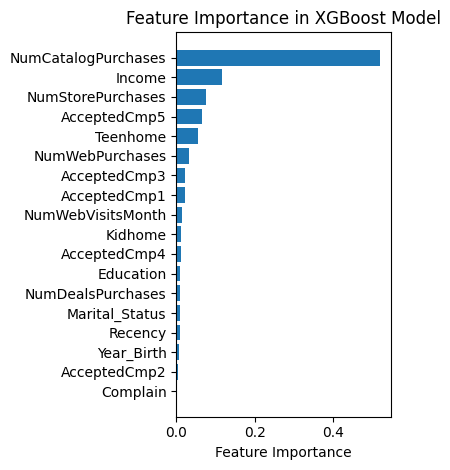

In [66]:
plt.subplot(1, 2, 2)
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
importance_df = importance_df.sort_values('importance', ascending=True)
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in XGBoost Model')

plt.tight_layout()
plt.show()


With this we can see something interseting. We have important features like NumCatalogPurchases, AcceptedCmp5, but these features are also responsible for high error rate. It's probably means that these features are actually important but require adjusments to work properly. The relationship to the target feature is probably more complex then linear.

PermutationExplainer explainer: 501it [00:42,  8.71it/s]                         


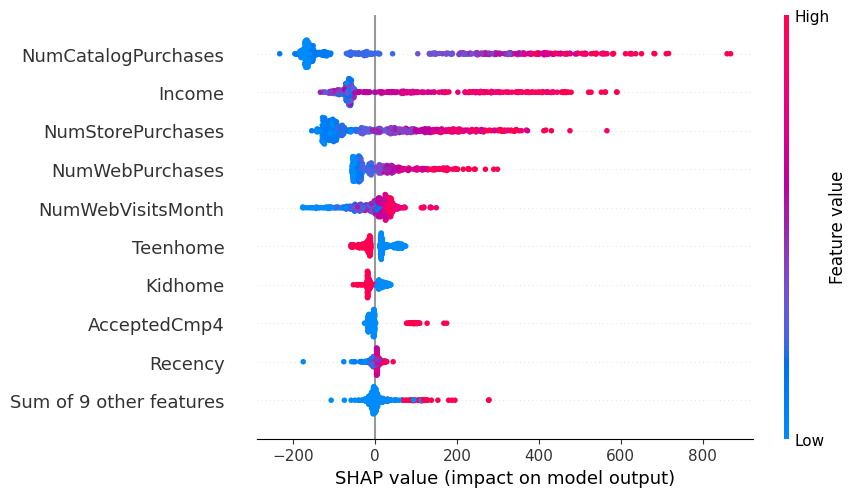

In [67]:
import shap
shap_sample = X_train.sample(500)
explainer = shap.Explainer(model.predict, shap_sample)
shap_values = explainer(shap_sample)
dtf.columns
shap.plots.beeswarm(shap_values)


We see from the graph that higher values (red) generally have a positive impact on the model output, while lower values (blue) have a negative impact, but also the wider the spread of points horizontally, the more variable the feature's impact can be and the first features are wide.

In [68]:
#What was our biggest relative error?
rel_res=residuals/y_test
rel_res=rel_res.abs()
print(rel_res[rel_res==rel_res.max()])

ID
3955    15.940018
Name: TotalMntProducts, dtype: float64


our model predicted: 101.64011
6 is the real value
Year_Birth             1965.0
Education                 0.0
Marital_Status            3.0
Income                 4861.0
Kidhome                   0.0
Teenhome                  0.0
Recency                  20.0
NumDealsPurchases         0.0
NumWebPurchases           0.0
NumCatalogPurchases       0.0
NumStorePurchases         0.0
NumWebVisitsMonth        14.0
AcceptedCmp3              0.0
AcceptedCmp4              0.0
AcceptedCmp5              0.0
AcceptedCmp1              0.0
AcceptedCmp2              0.0
Complain                  0.0
Name: 3955, dtype: float64 
are the features


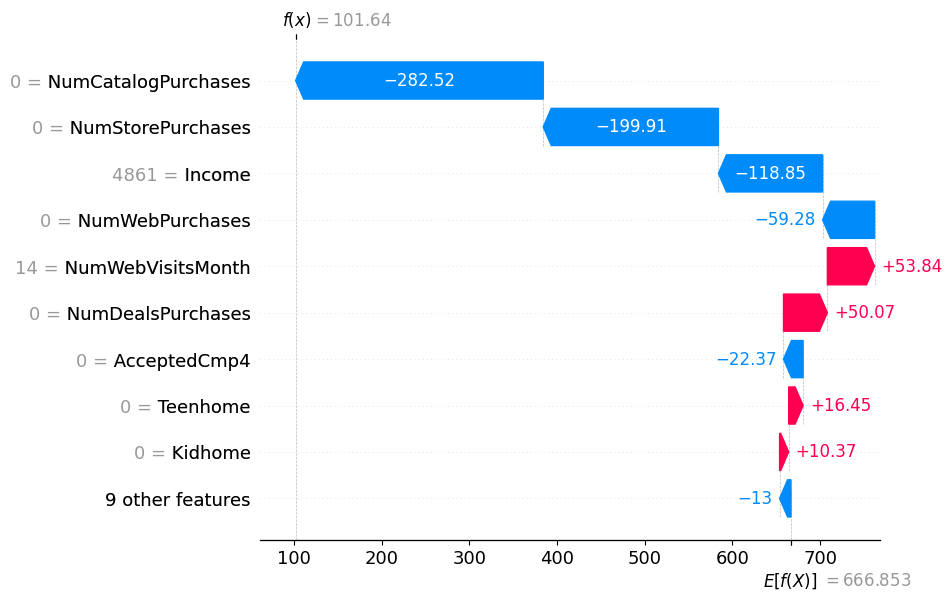

In [69]:
max_id = rel_res[rel_res==rel_res.max()].index[0]
pred_series=pd.Series(y_pred_test,index=rel_res.index)
print("our model predicted:", pred_series[max_id])
print(y_test[max_id], "is the real value")
print(X_test.loc[max_id], "\nare the features")

max_ordinal_id= X_test.index.get_loc(max_id)
shap.plots.waterfall(test_shap_values[max_ordinal_id])


We see here the large impacts of catalog purchase store purchase and income

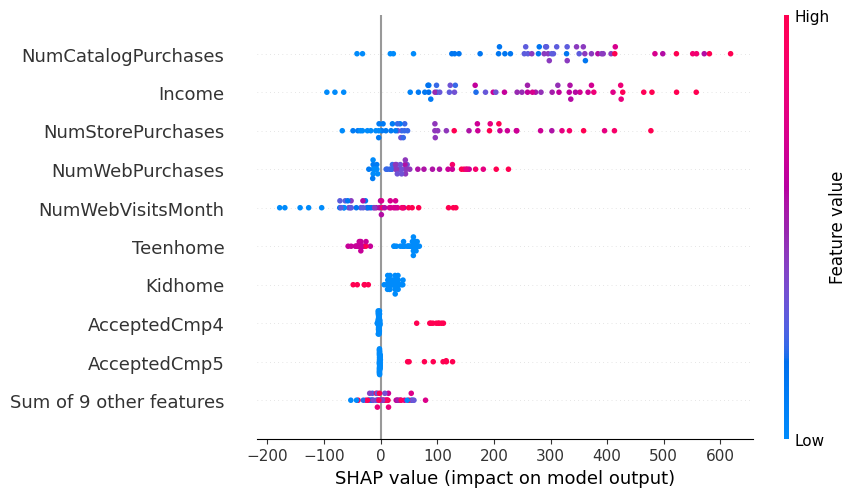

<Axes: >

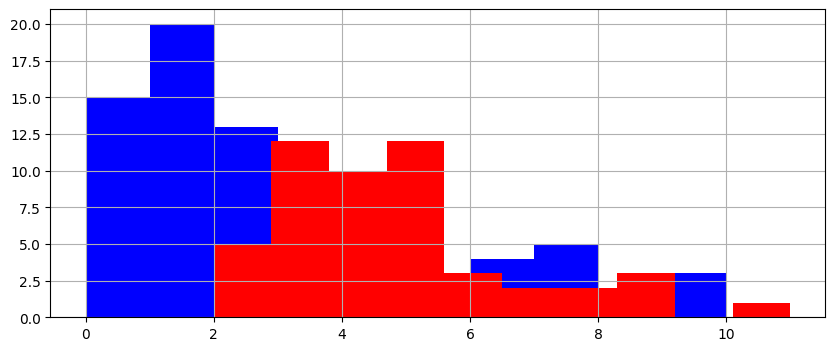

In [70]:
bad_examples = X_test.loc[residuals[residuals>200].index]
bad_examples_shap_values = explainer(bad_examples)
shap.plots.beeswarm(bad_examples_shap_values)

#To get even a deeper understanding regarding our model's mistakes, we can compare the distributions of our mistakes to good predictions
over_estimates = X_test.loc[residuals[residuals>200].index]
good_estimates = X_test.loc[rel_res[rel_res<0.05].index]
fig, ax = plt.subplots(figsize=(10,4))
good_estimates.NumCatalogPurchases.hist(ax=ax,color='blue')
over_estimates.NumCatalogPurchases.hist(ax=ax,color='red')
# We see that our overestimates have a higher number of catalog purchases


from this 2 graphs we can learn:

The model tends to overestimate when customers have a higher number of catalog purchases
we get another support for the claim that there's a non-linear relationship between catalog purchases and the target variable that the model isn't capturing.
The good predictions are more common with customers who make fewer catalog purchases